In [1]:
import os
os.chdir('/workspaces/work_utils2')

In [2]:
import presentation
import pandas as pd
import random_dataframe as rd
import query_tools as qt

In [3]:
ppt = presentation.PowerPointPresentation(template_filepath='presentation/assets/Blank.pptx')

# Create Title

In [4]:
# slide = ppt.add_slide('Title Only')
# slide.set_title(title='Title', subtitle='Subtitle')

# Load Mock-up Data

In [5]:
import json
with open('/workspaces/work_utils2/notebooks/creating_random_data/example_03.json', 'r') as f:
    specs = json.load(f)
df = rd.create_dataframe(specs, n_rows=1000, random_seed=42)
df.head(3)

,id,name,open_date,open_week,open_month,customer_id,score,active,value,category,product_category,quantity,price,is_discounted
0,1001,ZCoQh8uM5sw,2024-01-18,2024-09-13,2024-02-29,14,84.772634,True,110.326548,Low,Books,4,20.301470,False
1,1002,None,2024-05-28,2024-02-16,2024-08-31,482,76.796954,True,105.096745,Medium,Food,1,28.628610,False
2,1003,Gl5v8RyWA6PB7po99U9YR2Z4c,2024-09-14,2024-07-26,2024-06-30,56,74.505334,False,122.809963,Low,Clothing,3,47.137104,False


## Slide 1

In [6]:
agg_config = {
    "type": "aggregation",
    "spec": {
        "groupby": ["product_category"],
        "aggregations": [
            {"column": "customer_id", "function": "nunique", "name": "Customer Count"},
            {"column": "price", "function": "mean", "name": "Avg Price"},
            {"column": "quantity", "function": "sum", "name": "Total Quantity"},
            {"column": "is_discounted", "function": "mean", "name": "Discount Rate"},
        ]
    }
}
agg_df = qt.aggregations.process_aggregation(df, agg_config) \
    .set_index(agg_config['spec']['groupby'])
agg_df

,Customer Count,Avg Price,Total Quantity,Discount Rate
product_category,,,,
Books,130,31.386237,385,0.279720
Clothing,226,34.698821,702,0.322835
Electronics,257,31.499103,787,0.323944
Food,182,34.697477,496,0.285000
Home,112,35.230801,316,0.277311


In [7]:
default_style_settings = {
    "header": {
        "fill": "#FFFFFF",
        "vertical_alignment": "middle",
        "horizontal_alignment": "left",
        "font": {
            "color": "#000000",
            "bold": True,
            "size": 11,
            "name": "Arial"
        }
    },
    "defaults": {
        "fill": "#FFFFFF",
        "font": {
            "color": "#000000",
            "bold": False,
            "size": 11,
            "name": "Arial"
        }
    },
    "column_labels": {
        "product_category": "Product Category",
        "sales_amount": "Sales ($)",
        "units_sold": "Units",
        "profit_margin": "Profit %",
        "growth_rate": "Growth",
        "is_discounted": "Discounted",
    },
    "number_formats": {
        "Customer Count": ",.0f",
        "Avg Price": "$,.2f",
        "Total Quantity": ",",
        "Discount Rate": ".1%",
    }
}

In [8]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 1')
slide.add_table(data=agg_df, style_settings=None)

2025-04-06 17:47:54,739 - presentation.tables - INFO - Starting process to add DataFrame (5 rows x 4 cols) as table.
2025-04-06 17:47:54,740 - presentation.tables - INFO - Creating table shape at (1.0, 1.0) with size (4.80in, 2.40in)
2025-04-06 17:47:54,742 - presentation.tables - INFO - Table shape created.
2025-04-06 17:47:54,743 - presentation.tables - INFO - Populating table with headers and data...
2025-04-06 17:47:54,747 - presentation.tables - INFO - Table populated.
2025-04-06 17:47:54,750 - presentation.tables - INFO - Applied specified table dimensions (rows/columns).
2025-04-06 17:47:54,751 - presentation.tables - INFO - Applying table styling (row, column, cell precedence)...
2025-04-06 17:47:54,778 - presentation.tables - INFO - Table styling applied.
2025-04-06 17:47:54,780 - presentation.tables - INFO - Table successfully added and formatted on slide.


# Slide 2

In [9]:
agg_config = {
    "type": "aggregation",
    "spec": {
        "groupby": ["product_category", "is_discounted"],
        "aggregations": [
            {"column": "customer_id", "function": "nunique", "name": "Customer Count"},
            {"column": "price", "function": "mean", "name": "Avg Price"},
            {"column": "quantity", "function": "sum", "name": "Total Quantity"},
            {"column": "is_discounted", "function": "mean", "name": "Discount Rate"},
        ]
    }
}
agg_df = qt.aggregations.process_aggregation(df, agg_config)
agg_df

,product_category,is_discounted,Customer Count,Avg Price,Total Quantity,Discount Rate
0,Books,False,94,30.707658,278,0.0
1,Books,True,40,33.133576,107,1.0
2,Clothing,False,160,35.138506,489,0.0
3,Clothing,True,81,33.776553,213,1.0
4,Electronics,False,176,33.324410,517,0.0
5,Electronics,True,91,27.689767,270,1.0
6,Food,False,129,35.511080,366,0.0
7,Food,True,57,32.656334,130,1.0
8,Home,False,81,32.077423,232,0.0
9,Home,True,31,43.448693,84,1.0


In [10]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 2')

custom_settings =  {
        "position": {"left": 0.5, "top": 1.2},
        "col_widths": [
            1.0,
            1.5,
            0.7,
            0.7,
            0.7,
            0.7,
            0.7,
        ],  # Adjusted width for longer product name
        "row_heights": 0.3,
}
slide.add_table(data=agg_df, style_settings=custom_settings)

2025-04-06 17:47:54,847 - presentation.tables - INFO - Starting process to add DataFrame (10 rows x 6 cols) as table.
2025-04-06 17:47:54,848 - presentation.tables - INFO - Creating table shape at (0.5, 1.2) with size (6.00in, 3.30in)
2025-04-06 17:47:54,852 - presentation.tables - INFO - Table shape created.
2025-04-06 17:47:54,853 - presentation.tables - INFO - Populating table with headers and data...
2025-04-06 17:47:54,864 - presentation.tables - INFO - Table populated.
2025-04-06 17:47:54,873 - presentation.tables - INFO - Applied specified table dimensions (rows/columns).
2025-04-06 17:47:54,874 - presentation.tables - INFO - Applying table styling (row, column, cell precedence)...
2025-04-06 17:47:54,936 - presentation.tables - INFO - Table styling applied.
2025-04-06 17:47:54,937 - presentation.tables - INFO - Table successfully added and formatted on slide.


In [11]:
chart_df = agg_df.pivot(index='product_category', columns='is_discounted', values='Customer Count')
chart_df

is_discounted,False,True
product_category,,
Books,94,40
Clothing,160,81
Electronics,176,91
Food,129,57
Home,81,31


In [12]:
chart_df.reset_index()

is_discounted,product_category,False,True
0,Books,94,40
1,Clothing,160,81
2,Electronics,176,91
3,Food,129,57
4,Home,81,31


In [14]:
custom_style = {
    "chart_type": "stacked_bar",  # Horizontal stacked bar
    "position": {"left": 6.0, "top": 1.0}, # Position uses defaults if not specified
    "dimensions": {"width": 6.0, "height": 6.0}, # Override dimensions
    "title": {"text": "Sample Stacked Bar Chart", "font": {"size": 12, "color": "FF0000"}}, # Red title
    "legend": {"position": "top", "include_in_layout": True},
    "data_labels": {
        "enabled": True,
        "font": {"size": 8, "bold": True, "color": (255, 255, 255)}, # White font
        "position": "center",
        "number_format": "0",  # Show integers
    },
    "category_axis": {
        "tick_labels": {"font": {"size": 9}},
        "line": {"visible": False} # Hide category axis line
        },
    "value_axis": {
        "visible": True,
        "major_gridlines": False,
        "max_scale": 60,  # Set max value axis limit
        "number_format": "#,##0",  # Format axis labels with comma
        "line": {"visible": False} # Hide value axis line
    },
    "plot_area": {"border": {"visible": False}}, # Explicitly hide plot area border
    "colors": {  # Custom colors by series name (DataFrame column name)
        "Series 1": "4F81BD",  # Blue
        "Series 2": "C0504D",  # Red
        "Series 3": "9BBB59",  # Green
    },
    "gap_width": 100, # Narrower gap between bars
}

In [15]:
slide.add_chart(data=chart_df, style_settings=custom_settings)

2025-04-06 17:48:14,525 - presentation.charts - INFO - Chart 'None' created successfully (Type: BAR_STACKED).
2025-04-06 17:48:14,530 - presentation.charts - WARNING - Chart object does not have a 'plot_area' attribute. Cannot apply plot area formatting.
2025-04-06 17:48:14,533 - presentation.charts - INFO - Chart styling applied successfully.


# Save Presentation

In [16]:
ppt.save('test.pptx')

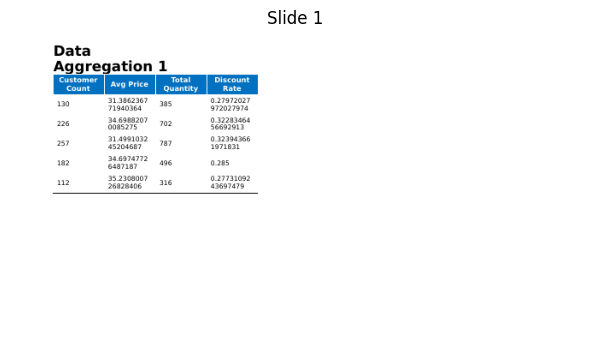

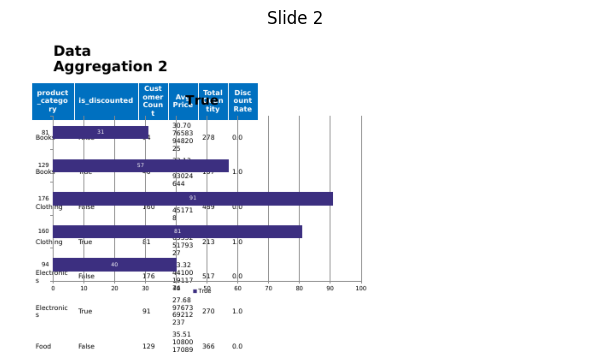

In [17]:
from presentation.pptx_preview import preview_presentation
# Preview an existing presentation
preview_presentation(ppt, figsize=(12/2, 8/2), dpi=50)